In [1]:
import matplotlib.pyplot as plt
import supy as sp
import pandas as pd
import numpy as np
from time import time
#sp.show_version()

# praktiskt om man vill kunna se alla kolumner och rader i en dataframe
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
#sp.show_version()

In [3]:
#df_state_init, df_forcing = sp.load_SampleData()
#grid = df_state_init.index[0]

In [2]:
# Orginal Sätt Path till runcontrol. Flera runcontrol kan användas om du t.ex. har olika forcing data.
#path_runcontrol = "/Users/juliacederbrant/Handledning_Julia/RunControl.nml"
#path_runcontrol

# Sätt Path till runcontrol. Flera runcontrol kan användas om du t.ex. har olika forcing data.
#path_runcontrol = "/Users/juliacederbrant/Handledning_Julia/RunControl.nml"
path_runcontrol = "/Volumes/NO NAME/masterarbete/SuPy/input_data/RunControl.nml"
path_runcontrol

'/Volumes/NO NAME/masterarbete/SuPy/input_data/RunControl.nml'

In [3]:
siteselect = pd.read_csv("/Volumes/NO NAME/masterarbete/SuPy/input_data/Input/SUEWS_SiteSelect.txt",        
        delim_whitespace=True,
        error_bad_lines=False,
        header= 1,
        index_col=0,)

#siteselect

In [6]:
# Olika sätt att slica och filtrera

#siteselect.filter(like='z')
#siteselect[['Alt','Timezone','Fr_Paved']]
#siteselect.loc[1,'Alt'] # Behöver rad och kolumn

In [7]:
#siteselect.filter(like='Fr')

In [8]:
# T.ex SUEWS_NonVeg.txt

# https://suews.readthedocs.io/en/latest/input_files/SUEWS_SiteInfo/SUEWS_NonVeg.html

#non_veg = pd.read_csv("/Users/juliacederbrant/Handledning_Julia/Input/SUEWS_NonVeg.txt",        
        #delim_whitespace=True,
        #error_bad_lines=False,
        #header= 1,
        #index_col=0,)

#non_veg

In [4]:
# Ladda in inställningarna i runcontrol och SiteSelect i SuPy som en DataFrame
df_state_init = sp.init_supy(path_runcontrol)

df_state_init

2021-02-23 16:33:28,069 - SuPy - INFO - All cache cleared.


var     ah_min       ah_slope_cooling      ah_slope_heating      ahprof_24hr                                                                                                                                                                                                                                                                                                                                                                       alb                                   albmax_dectr albmax_evetr albmax_grass albmin_dectr albmin_evetr albmin_grass alpha_bioco2               alpha_enh_bioco2                 alt baset           basete             baset_hc beta_bioco2               beta_enh_bioco2                 bldgh capmax_dec capmin_dec chanohm                               co2pointsource     cpanohm                                                                crwmax crwmin daywat                               daywatper                               dectreeh drainrt ef_umolco2perj  \
ind_dim   (0,)  (1,)             (0,) (1,)             (0,) (1,)      (0, 0) (0, 1) (1, 0) (1, 1) (2, 0) (2, 1) (3, 0) (3, 1) (4, 0) (4, 1) (5, 0) (5, 1) (6, 0) (6, 1) (7, 0) (7, 1) (8, 0) (8, 1) (9, 0) (9, 1) (10, 0) (10, 1) (11, 0) (11, 1) (12, 0) (12, 1) (13, 0) (13, 1) (14, 0) (14, 1) (15, 0) (15, 1) (16, 0) (16, 1) (17, 0) (17, 1) (18, 0) (18, 1) (19, 0) (19, 1) (20, 0) (20, 1) (21, 0) (21, 1) (22, 0) (22, 1) (23, 0) (23, 1) (0,)  (1,) (2,)  (3,)  (4,)  (5,) (6,)            0            0            0            0            0            0         (0,)   (1,)   (2,)             (0,)   (1,)   (2,)     0  (0,) (1,) (2,)   (0,)  (1,)  (2,)        0        (0,)   (1,)   (2,)            (0,)    (1,)    (2,)     0          0          0    (0,) (1,) (2,) (3,) (4,) (5,) (6,)              0        (0,)        (1,)      (2,)      (3,)      (4,)        (5,)     (6,)      0      0   (0,) (1,) (2,) (3,) (4,) (5,) (6,)      (0,) (1,) (2,) (3,) (4,) (5,) (6,)        0       0              0   
grid                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
1         15.0  15.0              2.7  2.7              2.7  2.7        0.57   0.65   0.45   0.49   0.43   0.46    0.4   0.47    0.4   0.47   0.45   0.53   0.71    0.7    1.2   1.13   1.44   1.37   1.29   1.37    1.28     1.3    1.31    1.37     1.3    1.33    1.32     1.3    1.35    1.27    1.44    1.36    1.51    1.44    1.41     1.3    1.14     1.1    0.99    0.98    0.86    0.84    0.85     0.9     0.8    0.87     0.7    0.74  0.1  0.12  0.1  0.18  0.21  0.18  0.1         0.18          0.1         0.21         0.12          0.1         0.18        0.005  0.005  0.005            0.016  0.016  0.016  35.0   6.0  6.0  6.0   11.0  11.0  11.0     18.2       8.747  8.747  8.747          33.454  33.454  33.454  22.0        0.8        0.3     4.0  4.0  4.0  4.0  4.0  4.0  4.0            0.0  20000000.0  20000000.0  100000.0  100000.0  100000.0  20000000.0  10000.0    0.1   0.03    0.0  0.0  0.0  0.0  0.0  0.0  0.0       0.0  0.0  0.0  0.0  0.0  0.0  0.0     13.1    0.25          1.159   

var

In [5]:
# Grid df_state_init, se ovan. Fler Grids kan användas
grid = df_state_init.index[0] 

In [7]:
#forcing_2011 = pd.read_csv("/Users/juliacederbrant/Handledning_Julia/Input/Kc_2011_data_60.txt",        
        #delim_whitespace=True,
        #error_bad_lines=False,
        #header= 0,
        #index_col=0)

#forcing_2011

forcing_2017 = pd.read_csv("/Volumes/NO NAME/masterarbete/SuPy/input_data/Input/Kb_2017_data_60.txt",        
        delim_whitespace=True,
        error_bad_lines=False,
        header= 0,
        index_col=0)

#forcing_2018

forcing_2018 = pd.read_csv("/Volumes/NO NAME/masterarbete/SuPy/input_data/Input/Kb_2018_data_60.txt",        
        delim_whitespace=True,
        error_bad_lines=False,
        header= 0,
        index_col=0)

#forcing_2018

In [8]:
# sp.load_forcing_grid sätter Datetime som index på forcing data, samst läser in all forcing data!

df_forcing = sp.load_forcing_grid(path_runcontrol, grid)

#sp.check för kolla så att forcing funkar
sp.check_forcing(df_forcing)
#df_forcing

2021-02-23 16:34:09,975 - SuPy - INFO - All cache cleared.
2021-02-23 16:34:15,904 - SuPy - INFO - SuPy is validating `df_forcing`...
2021-02-23 16:34:24,224 - SuPy - INFO - All checks for `df_forcing` passed!


In [13]:
#från tutorial https://supy.readthedocs.io/en/latest/tutorial/impact-studies.html#SuPy

#
#s = '2017 08 04'
#e = '2017 08 30'

#var = 'rain'

#fig, ax =  sp.util.plot_day_clm(df_forcing.loc[s:e,[var]])
#ax.set_title((var + ': ' +  s + ' : ' + e), fontsize=20);

In [45]:
#matplotlib
#s = '2017 08 04'
#e = '2017 08 30'

#var = 'rain'

#ax_output = df_forcing.loc[s:e,var].plot(figsize=(12,4))
#ax_output.set_title((str(var) + ': ' +  s + ' : ' + e), fontsize=20);

In [9]:
# changes lc in code but not in data

#Hardmade
df_state_init_imperv = df_state_init.copy()

df_state_init_imperv.loc[:, ('sfr', '(0,)')] = 0.5 # paved
df_state_init_imperv.loc[:, ('sfr', '(1,)')] = 0.4 # building
df_state_init_imperv.loc[:, ('sfr', '(2,)')] = 0 # evergreen tree
df_state_init_imperv.loc[:, ('sfr', '(3,)')] = 0 # deciduous tree
df_state_init_imperv.loc[:, ('sfr', '(4,)')] = 0 # grass
df_state_init_imperv.loc[:, ('sfr', '(5,)')] = 0.1 # bare soil
df_state_init_imperv.loc[:, ('sfr', '(6,)')] = 0 # water

#increasing trees and greenery
df_state_init_increasegreen = df_state_init.copy()
df_state_init_increasegreen.loc[:, ('sfr', '(0,)')] = 0.4 # paved
df_state_init_increasegreen.loc[:, ('sfr', '(1,)')] = 0.2 # building
df_state_init_increasegreen.loc[:, ('sfr', '(2,)')] = 0.1 # evergreen tree
df_state_init_increasegreen.loc[:, ('sfr', '(3,)')] = 0.1 # deciduous tree
df_state_init_increasegreen.loc[:, ('sfr', '(4,)')] = 0.1 # grass
df_state_init_increasegreen.loc[:, ('sfr', '(5,)')] = 0.05 # bare soil
df_state_init_increasegreen.loc[:, ('sfr', '(6,)')] = 0.05 # water

#a lot of trees
df_state_init_halftreesgrass = df_state_init.copy()
df_state_init_halftreesgrass.loc[:, ('sfr', '(0,)')] = 0.2 # paved
df_state_init_halftreesgrass.loc[:, ('sfr', '(1,)')] = 0.1 # building
df_state_init_halftreesgrass.loc[:, ('sfr', '(2,)')] = 0.2 # evergreen tree
df_state_init_halftreesgrass.loc[:, ('sfr', '(3,)')] = 0.2 # deciduous tree
df_state_init_halftreesgrass.loc[:, ('sfr', '(4,)')] = 0.3 # grass
df_state_init_halftreesgrass.loc[:, ('sfr', '(5,)')] = 0.0 # bare soil
df_state_init_halftreesgrass.loc[:, ('sfr', '(6,)')] = 0.0 # water

#keeping paved and buildings, increasing water
df_state_init_impervwater = df_state_init.copy()
df_state_init_impervwater.loc[:, ('sfr', '(0,)')] = 0.5 # paved
df_state_init_impervwater.loc[:, ('sfr', '(1,)')] = 0.3 # building
df_state_init_impervwater.loc[:, ('sfr', '(2,)')] = 0.0 # evergreen tree
df_state_init_impervwater.loc[:, ('sfr', '(3,)')] = 0.0 # deciduous tree
df_state_init_impervwater.loc[:, ('sfr', '(4,)')] = 0.0 # grass
df_state_init_impervwater.loc[:, ('sfr', '(5,)')] = 0.0 # bare soil
df_state_init_impervwater.loc[:, ('sfr', '(6,)')] = 0.2 # water

#keeping paved and buildings, greenery and no water
df_state_init_greenerynowater = df_state_init.copy()
df_state_init_greenerynowater.loc[:, ('sfr', '(0,)')] = 0.5 # paved
df_state_init_greenerynowater.loc[:, ('sfr', '(1,)')] = 0.3 # building
df_state_init_greenerynowater.loc[:, ('sfr', '(2,)')] = 0.05 # evergreen tree
df_state_init_greenerynowater.loc[:, ('sfr', '(3,)')] = 0.05 # deciduous tree
df_state_init_greenerynowater.loc[:, ('sfr', '(4,)')] = 0.1 # grass
df_state_init_greenerynowater.loc[:, ('sfr', '(5,)')] = 0.0 # bare soil
df_state_init_greenerynowater.loc[:, ('sfr', '(6,)')] = 0.0 # water

#keeping paved and buildings, greenery and more water
df_state_init_greeneryandwater = df_state_init.copy()
df_state_init_greeneryandwater.loc[:, ('sfr', '(0,)')] = 0.5 # paved
df_state_init_greeneryandwater.loc[:, ('sfr', '(1,)')] = 0.3 # building
df_state_init_greeneryandwater.loc[:, ('sfr', '(2,)')] = 0.05 # evergreen tree
df_state_init_greeneryandwater.loc[:, ('sfr', '(3,)')] = 0.05 # deciduous tree
df_state_init_greeneryandwater.loc[:, ('sfr', '(4,)')] = 0.05 # grass
df_state_init_greeneryandwater.loc[:, ('sfr', '(5,)')] = 0.0 # bare soil
df_state_init_greeneryandwater.loc[:, ('sfr', '(6,)')] = 0.05 # water

#keeping paved and buildings, greenery and more water
df_state_init_treesandwater = df_state_init.copy()
df_state_init_treesandwater.loc[:, ('sfr', '(0,)')] = 0.5 # paved
df_state_init_treesandwater.loc[:, ('sfr', '(1,)')] = 0.3 # building
df_state_init_treesandwater.loc[:, ('sfr', '(2,)')] = 0.05 # evergreen tree
df_state_init_treesandwater.loc[:, ('sfr', '(3,)')] = 0.05 # deciduous tree
df_state_init_treesandwater.loc[:, ('sfr', '(4,)')] = 0.0 # grass
df_state_init_treesandwater.loc[:, ('sfr', '(5,)')] = 0.0 # bare soil
df_state_init_treesandwater.loc[:, ('sfr', '(6,)')] = 0.1 # water


#keeping paved and buildings, grass and more water
df_state_init_grassandwater = df_state_init.copy()
df_state_init_grassandwater.loc[:, ('sfr', '(0,)')] = 0.5 # paved
df_state_init_grassandwater.loc[:, ('sfr', '(1,)')] = 0.3 # building
df_state_init_grassandwater.loc[:, ('sfr', '(2,)')] = 0.0 # evergreen tree
df_state_init_grassandwater.loc[:, ('sfr', '(3,)')] = 0.0 # deciduous tree
df_state_init_grassandwater.loc[:, ('sfr', '(4,)')] = 0.1 # grass
df_state_init_grassandwater.loc[:, ('sfr', '(5,)')] = 0.0 # bare soil
df_state_init_grassandwater.loc[:, ('sfr', '(6,)')] = 0.1 # water


In [26]:
#kod för att köra supy
df_output, df_state_final = sp.run_supy(df_forcing, df_state_init)

df_output_imperv, df_state_final_imperv = sp.run_supy(df_forcing, df_state_init_imperv)

df_output_increasegreen, df_state_final_increasegreen = sp.run_supy(df_forcing, df_state_init_increasegreen)

df_output_halftreesgrass, df_state_final_halftreesgrass = sp.run_supy(df_forcing, df_state_init_halftreesgrass)

df_output_impervwater, df_state_final_impervwater = sp.run_supy(df_forcing, df_state_init_impervwater)

df_output_greenerynowater, df_state_final_greenerynowater = sp.run_supy(df_forcing, df_state_init_greenerynowater)

df_output_greenerynowater, df_state_final_greenerynowater = sp.run_supy(df_forcing, df_state_init_greenerynowater)

df_output_greenerynowater, df_state_final_greenerynowater = sp.run_supy(df_forcing, df_state_init_greenerynowater)

df_output_greenerynowater, df_state_final_greenerynowater = sp.run_supy(df_forcing, df_state_init_greenerynowater)



2021-02-23 14:26:08,018 - SuPy - INFO - ====================
2021-02-23 14:26:08,052 - SuPy - INFO - Simulation period:
2021-02-23 14:26:08,061 - SuPy - INFO -   Start: 2016-12-31 23:05:00
2021-02-23 14:26:08,069 - SuPy - INFO -   End: 2018-12-31 23:00:00
2021-02-23 14:26:08,087 - SuPy - INFO - 
2021-02-23 14:26:08,108 - SuPy - INFO - No. of grids: 1
2021-02-23 14:26:08,143 - SuPy - INFO - SuPy is running in serial mode
2021-02-23 14:26:55,047 - SuPy - INFO - Execution time: 47.0 s
2021-02-23 14:26:55,057 - SuPy - INFO - ====================

2021-02-23 14:26:55,102 - SuPy - INFO - ====================
2021-02-23 14:26:55,109 - SuPy - INFO - Simulation period:
2021-02-23 14:26:55,117 - SuPy - INFO -   Start: 2016-12-31 23:05:00
2021-02-23 14:26:55,131 - SuPy - INFO -   End: 2018-12-31 23:00:00
2021-02-23 14:26:55,142 - SuPy - INFO - 
2021-02-23 14:26:55,150 - SuPy - INFO - No. of grids: 1
2021-02-23 14:26:55,155 - SuPy - INFO - SuPy is running in serial mode
2021-02-23 14:27:35,833 - S

In [48]:
#KODEN NEDAN (8 celler) är för att kunna köra supy med olika albedo och LC och få den i samma datafram (df)
#från tutorial https://supy.readthedocs.io/en/latest/tutorial/impact-studies.html

#df_state_init.alb

In [49]:
#från tutorial https://supy.readthedocs.io/en/latest/tutorial/impact-studies.html
#df_state_init_test = df_state_init.copy()

In [50]:
#från tutorial https://supy.readthedocs.io/en/latest/tutorial/impact-studies.html
#df_state_init_test.sfr = 0
#df_state_init_test.loc[:, ('sfr', '(6,)')] = 1
#df_state_init_test.sfr

In [51]:
#från tutorial https://supy.readthedocs.io/en/latest/tutorial/impact-studies.html
# create a `df_state_init_x` with different surface properties
#n_test = 48
#list_alb_test = np.linspace(0.1, 0.8, n_test).round(2)
#df_state_init_x = df_state_init_test.append(
    #[df_state_init_test]*(n_test-1), ignore_index=True)

# here we modify surface albedo
#df_state_init_x.loc[:, ('alb', '(1,)')] = list_alb_test
#df_state_init_x.index=df_state_init_x.index.rename('grid')

In [52]:
#från tutorial https://supy.readthedocs.io/en/latest/tutorial/impact-studies.html
#df_res_alb_test,df_state_final_x = sp.run_supy(df_forcing, df_state_init_x)

In [53]:
#från tutorial https://supy.readthedocs.io/en/latest/tutorial/impact-studies.html
# choose results of July 2017 for analysis
#df_res_alb_test_july = df_res_alb_test.SUEWS.unstack(0).loc["2017 7"]
#df_res_alb_T2_stat = df_res_alb_test_july.T2.describe()
#df_res_alb_T2_diff = df_res_alb_T2_stat.transform(
    #lambda x: x - df_res_alb_T2_stat.iloc[:, 0]
#)
#df_res_alb_T2_diff.columns = list_alb_test - list_alb_test[0]

In [54]:
#från tutorial https://supy.readthedocs.io/en/latest/tutorial/impact-studies.html
#ax_temp_diff = df_res_alb_T2_diff.loc[["max", "mean", "min"]].T.plot()
#_ = ax_temp_diff.set_ylabel("$\Delta T_2$ ($^{\circ}}$C)")
#_ = ax_temp_diff.set_xlabel(r"$\Delta\alpha$")
#ax_temp_diff.margins(x=0.2, y=0.2)

In [27]:
df_output.columns.levels[0]

Index(['BEERS', 'DailyState', 'RSL', 'SUEWS', 'debug', 'snow'], dtype='object', name='group')

In [28]:
df_output.head()

1.844908  1.916245  1.990341  2.067301  2.147237  2.230264  2.316502  2.406074  2.499110  2.595743  2.696112  2.800362  2.908644  3.021112  3.137929  3.319687  3.484069  3.634710  3.774177  3.904352  4.026657  4.142190  4.251824  4.356259  4.456068  4.551727  4.643635  4.732129  4.817501  4.9  7.894057  7.894211  7.894366  7.894520  7.894676  7.894831  7.894987  7.895143  7.895299  7.895456  7.895613  7.895770  7.895928  7.896086  7.896244  7.896550  7.896844  7.897128  7.897403  7.897669  7.897928  7.898180  7.898426  7.898666  7.898901  7.899130  7.899354  7.899574  7.899789  7.9  6.305332  6.305180  6.305028  6.304875  6.304722  6.304569  6.304415  6.304262  6.304107  6.303953  6.303798  6.303644  6.303488  6.303333  6.303177  6.302875  6.302586  6.302306  6.302035  6.301773  6.301517  6.301269  6.301027  6.300790  6.300559  6.300333  6.300112  6.299896  6.299684  6.299476   5992.871469  16.518313   

group                                                                                                                                                   SUEWS                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  debug                                                        \
var                               Lc     beta    zd_RSL    z0_RSL        elm       Scc         f UStar_RSL UStar_heat TStar_RSL     FAI    PAI flag_RSL Kdown  Kup       Ldown         Lup Tsurf         QN         QF        QS        QH        QE   QHlumps   QElumps       QHresis      Rain  Irr      Evap        RO     TotCh    SurfCh       State NWtrState  Drainage        SMD FlowCh AddWater ROSoil    ROPipe ROImp ROVeg ROWater WUInt WUEveTr WUDecTr WUGrass   SMDPaved   SMDBldgs   SMDEveTr   SMDDecTr  SMDGrass SMDBSoil   StPaved   StBldgs   StEveTr   StDecTr   StGrass StBSoil       StWater      Zenith     Azimuth AlbBulk      Fcld     LAI       z0m        zdm     UStar           Lob         RA           RS   Fc FcPhoto FcRespi FcMetab FcTraff FcBuild FcPoint   QNSnowFr QNSnow AlbSnow   QM QMFreeze QMRain  SWE MeltWater MeltWStore SnowCh SnowRPaved SnowRBldgs        Ts        T2        Q2       U10        RH2    RSS_Paved      RSS_Bldgs    RSS_EveTr    RSS_DecTr    RSS_Grass   
grid datetime                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
1    2016-12-31 23:05:00  103.239458  0.37494  2.004928  6.064927  10.883291  0.492174  0.047008  0.951361   0.9

In [29]:
df_output_suews = df_output['SUEWS']

In [30]:
df_output_suews.loc[:, ['QN', 'QS', 'QH', 'QE', 'QF']].describe()

var,QN,QS,QH,QE,QF
count,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000
mean,54.565263,24.016540,49.833260,14.674158,33.958696
std,152.889330,94.110061,58.806341,22.397869,13.953908
min,-91.422737,-105.941487,-50.850314,-0.873647,10.748587
25%,-35.481917,-29.612226,10.368018,1.902297,21.315249
50%,-19.930395,-10.318156,34.724667,5.812442,35.487220
75%,78.126496,38.671679,65.357609,16.651180,44.382371
max,644.576656,447.839012,306.524778,208.783102,76.468386


In [31]:
# code for better names on variables
dict_var_disp = {
    'QN': '$Q^*$',
    'QS': r'$\Delta Q_S$',
    'QE': '$Q_E$',
    'QH': '$Q_H$',
    'QF': '$Q_F$',
    'Kdown': r'$K_{\downarrow}$',
    'Kup': r'$K_{\uparrow}$',
    'Ldown': r'$L_{\downarrow}$',
    'Lup': r'$L_{\uparrow}$',
    'Rain': '$P$',
    'Irr': '$I$',
    'Evap': '$E$',
    'RO': '$R$',
    'TotCh': '$\Delta S$',
}

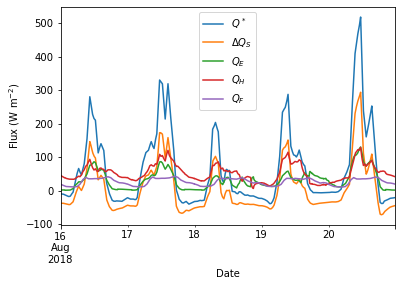

In [16]:
#testar för ändrat lc  # ev ta bort grid
#plot all Qs
ax_output = df_output_suews\
    .loc[grid]\
    .loc['2018 08 16':'2018 08 020',
         ['QN', 'QS', 'QE', 'QH', 'QF']]\
    .rename(columns=dict_var_disp)\
    .plot()
_ = ax_output.set_xlabel('Date')
_ = ax_output.set_ylabel('Flux ($ \mathrm{W \ m^{-2}}$)')
_ = ax_output.legend()

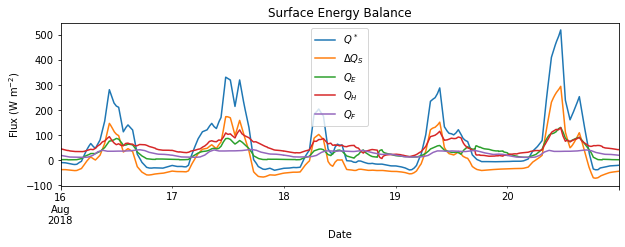

In [17]:
# energy balance
s = '2018 08 16'
e = '2018 08 20'
#var = ["QN", "QS", "QE", "QH", "QF"]


ax_output = (
    df_output_suews.loc[grid]
    .loc[s:e, ["QN", "QS", "QE", "QH", "QF"]]
    .rename(columns=dict_var_disp)
    .plot(figsize=(10, 3), title="Surface Energy Balance",)
)
_ = ax_output.set_xlabel("Date")
_ = ax_output.set_ylabel("Flux ($ \mathrm{W \ m^{-2}}$)")
_ = ax_output.legend()

In [18]:
rsmp_1d = df_output_suews.loc[grid].resample("1d")
# daily mean values
df_1d_mean = rsmp_1d.mean()
# daily sum values
df_1d_sum = rsmp_1d.sum()

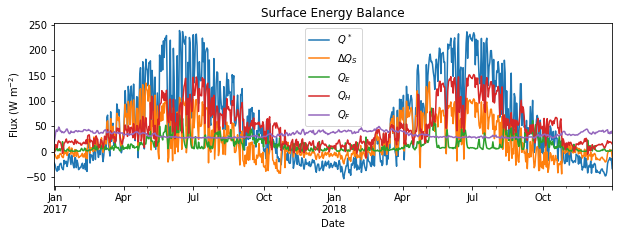

In [19]:
# energy balance
ax_output = (
    df_1d_mean.loc[:, ["QN", "QS", "QE", "QH", "QF"]]
    .rename(columns=dict_var_disp)
    .plot(figsize=(10, 3), title="Surface Energy Balance",)
)
_ = ax_output.set_xlabel("Date")
_ = ax_output.set_ylabel("Flux ($ \mathrm{W \ m^{-2}}$)")
_ = ax_output.legend()


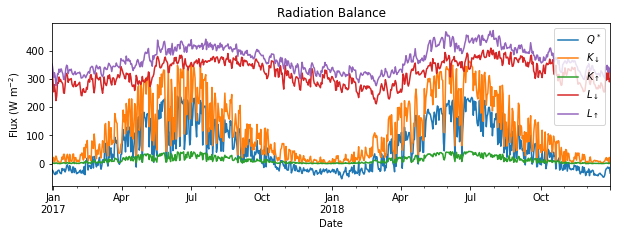

In [20]:
# radiation balance        : betyder allt
ax_output = (
    df_1d_mean.loc[:, ["QN", "Kdown", "Kup", "Ldown", "Lup"]]
    .rename(columns=dict_var_disp)
    .plot(figsize=(10, 3), title="Radiation Balance",)
)
_ = ax_output.set_xlabel("Date")
_ = ax_output.set_ylabel("Flux ($ \mathrm{W \ m^{-2}}$)")
_ = ax_output.legend()

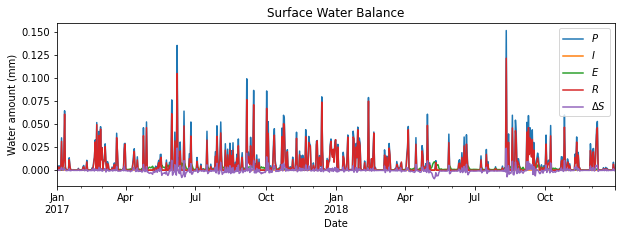

In [21]:
# water balance
s = '2017'
e = '2018'

ax_output = (
    df_1d_mean.loc[s:e, ["Rain", "Irr", "Evap", "RO", "TotCh"]]
    .rename(columns=dict_var_disp)
    .plot(figsize=(10, 3), title="Surface Water Balance",)
)
_ = ax_output.set_xlabel("Date")
_ = ax_output.set_ylabel("Water amount (mm)")
_ = ax_output.legend()

In [66]:
#testar vad den gör

df_1d_mean.loc[:, ["Rain", "Irr", "Evap", "RO", "TotCh"]]

var,Rain,Irr,Evap,RO,TotCh
datetime,,,,,
2016-12-31,0.083333,0.0,-0.004548,0.169935,0.014210
2017-01-01,0.003762,0.0,0.000173,0.003260,0.000483
2017-01-02,0.000000,0.0,0.000051,0.000000,-0.000051
2017-01-03,0.004514,0.0,0.000426,0.002969,0.001119
2017-01-04,0.004861,0.0,0.000876,0.000002,-0.000064
...,...,...,...,...,...
2018-12-27,0.000000,0.0,0.000040,0.000000,-0.000040
2018-12-28,0.000000,0.0,0.000037,0.000000,-0.000037
2018-12-29,0.008681,0.0,0.000230,0.007536,0.000915


In [32]:
df_output_merge_x=pd.concat([df_output, df_output_2, df_output_3,df_output_4, df_output_5],axis=1,join='inner',keys=['1','2','3', '4', '5']).swaplevel(0,-1,axis=1).swaplevel(0,1,axis=1).sort_index(axis=1).loc[grid]

df_merge_x=df_output_merge_x.SUEWS

In [48]:
df_merge_x['QH'].plot()

Error: Pip module Unable to parse debugpy output, please log an issue with https://github.com/microsoft/vscode-jupyter is required for debugging cells. You will need to install it to debug cells.

In [32]:
from datetime import date,datetime

def supy_plot(var, df_in, s,e, size=False):

    if size:   
        size=size
    else:
        size = 10, 6

    color1 = ('b', 'g', 'r', 'c', 'm')
    color2 = ('g', 'r', 'c', 'm')

    fig, axes = plt.subplots(2, 1, sharex=True)
    a = df_in.loc[s:e,[var]]\
        .plot(ax=axes[0],figsize=(size),title=var, colors=color1)

    #f_date = (date(int(s[0:4]),int(s[5:7]),int(s[7:10])))
    #l_date = (date(int(e[0:4]),int(e[5:7]),int(e[7:10])))
    #f_date - datetime.timedelta(days=2)    
    #l_date + datetime.timedelta(days=2)
    
    #plt.hlines(0,f_date - datetime.timedelta(days=2),l_date + datetime.timedelta(days=2),\
        #linestyles='--',colors='grey')
        # byt till dina variabelnamn
    a.legend(['1','2','3', '4', '5'])

    b = df_diff_m=pd.concat([df_in.loc[s:e,(var,'2')]-df_in.loc[s:e,(var,'1')],\
        df_in.loc[s:e,(var,'3')]-df_in.loc[s:e,(var,'1')],\
        df_in.loc[s:e,(var,'4')]-df_in.loc[s:e,(var,'1')],\
        df_in.loc[s:e,(var,'5')]-df_in.loc[s:e,(var,'1')],\
        ],\
        axis=1,join='inner',keys=['1','2','3', '4', '5']).sort_index(axis=1).\
        plot(ax=axes[1], figsize=(size), title = ('Difference '),colors=color2)

    b.legend(['2','3', '4', '5'])


In [34]:
from datetime import date,datetime

def supy_plot(var, df_in, s,e, size=False):

    if size:   
        size=size
    else:
        size = 10, 6

    fig, axes = plt.subplots(2, 1, sharex=True)
    a = df_in.loc[s:e,[var]]\
        .plot(ax=axes[0],figsize=(size),title=var)

    #f_date = (date(int(s[0:4]),int(s[5:7]),int(s[7:10])))
    #l_date = (date(int(e[0:4]),int(e[5:7]),int(e[7:10])))
    #f_date - datetime.timedelta(days=2)    
    #l_date + datetime.timedelta(days=2)
    
    #plt.hlines(0,f_date - datetime.timedelta(days=2),l_date + datetime.timedelta(days=2),\
        #linestyles='--',colors='grey')
        # byt till dina variabelnamn
    a.legend(['kville','imperv','increasegreen', 'halftreesgrass', 'impervwater'])

    b = df_diff_m=pd.concat([df_in.loc[s:e,(var,'2')]-df_in.loc[s:e,(var,'1')],\
        df_in.loc[s:e,(var,'3')]-df_in.loc[s:e,(var,'1')],\
        df_in.loc[s:e,(var,'4')]-df_in.loc[s:e,(var,'1')],\
        df_in.loc[s:e,(var,'5')]-df_in.loc[s:e,(var,'1')],\
        ],\
        axis=1,join='inner',keys=['kville', 'imperv','increasegreen', 'halftreesgrass', 'impervwater']).sort_index(axis=1).\
        plot(ax=axes[1], figsize=(size), title = ('Difference '))

    b.legend(['imperv','increasegreen', 'halftreesgrass', 'impervwater'])

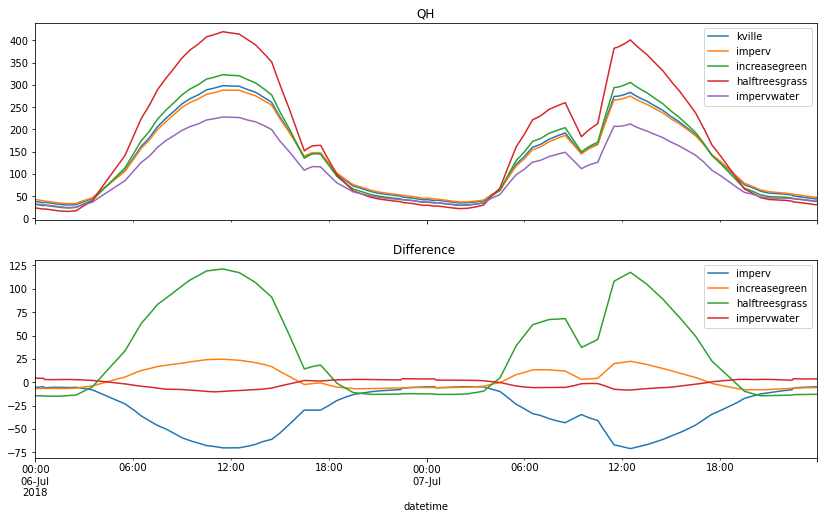

In [37]:
s = '2018 07 06'
e = '2018 07 07'

supy_plot('QH', df_merge_x, s,e, size=(14,8))

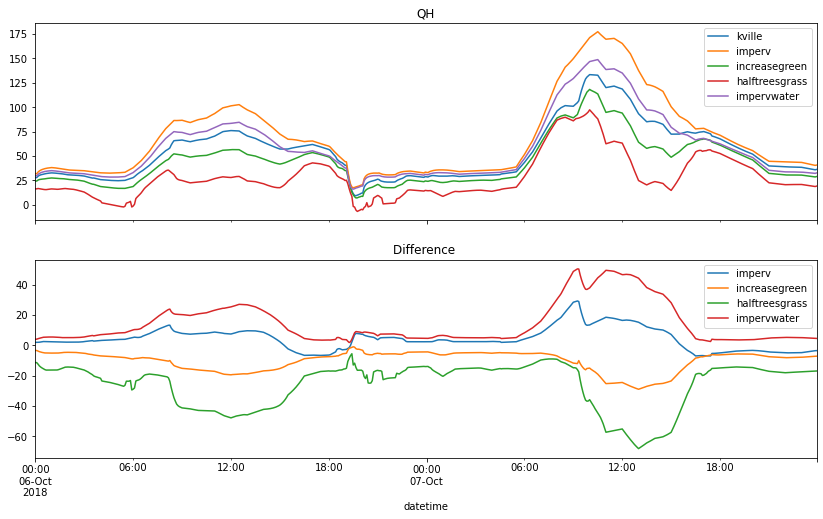

In [38]:
s = '2018 10 06'
e = '2018 10 07'

supy_plot('QH', df_merge_x, s,e, size=(14,8))

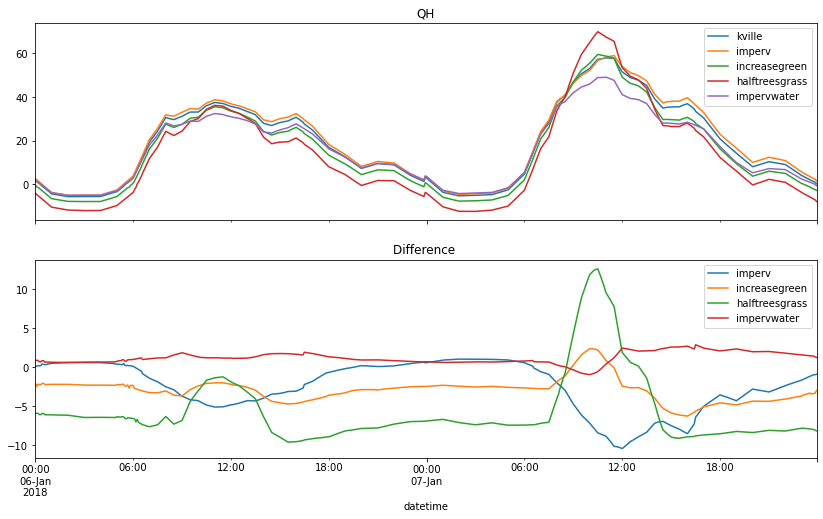

In [39]:
s = '2018 01 06'
e = '2018 01 07'

supy_plot('QH', df_merge_x, s,e, size=(14,8))

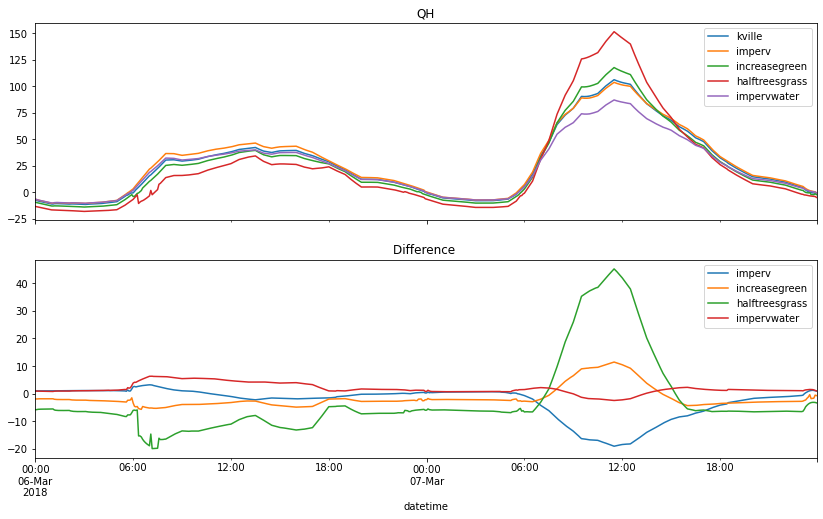

In [40]:
s = '2018 03 06'
e = '2018 03 07'

supy_plot('QH', df_merge_x, s,e, size=(14,8))

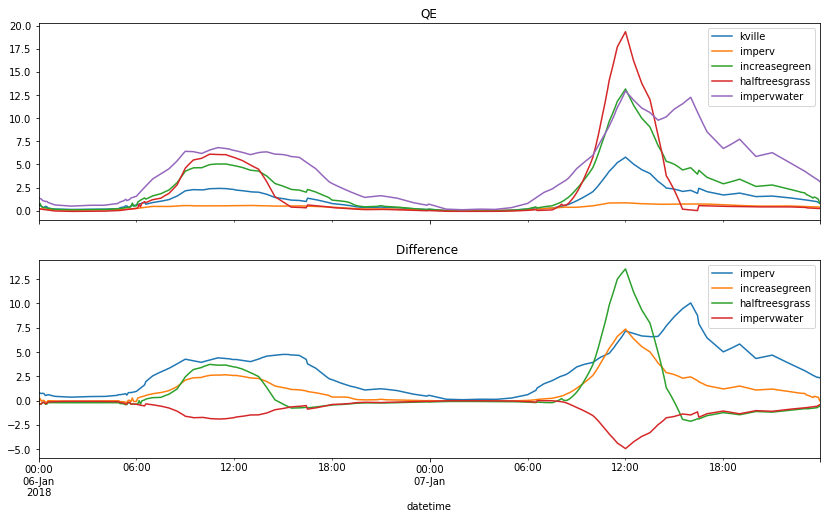

In [41]:
s = '2018 01 06'
e = '2018 01 07'

supy_plot('QE', df_merge_x, s,e, size=(14,8))

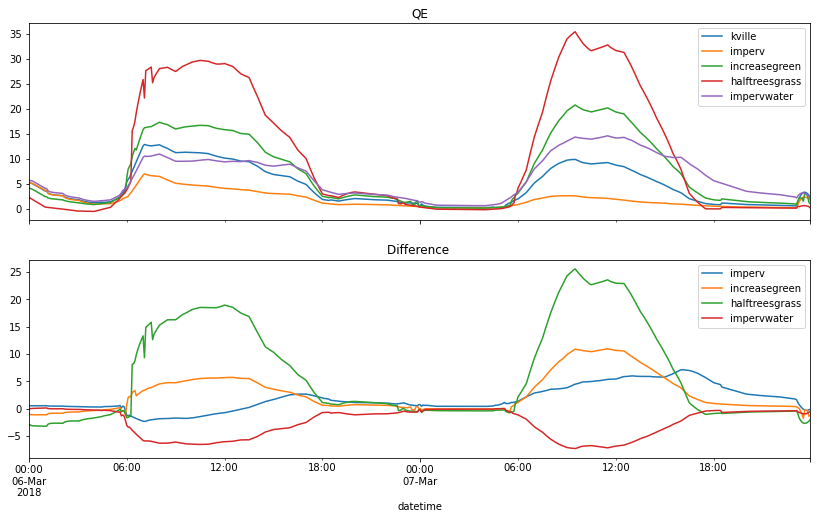

In [42]:
s = '2018 03 06'
e = '2018 03 07'

supy_plot('QE', df_merge_x, s,e, size=(14,8))

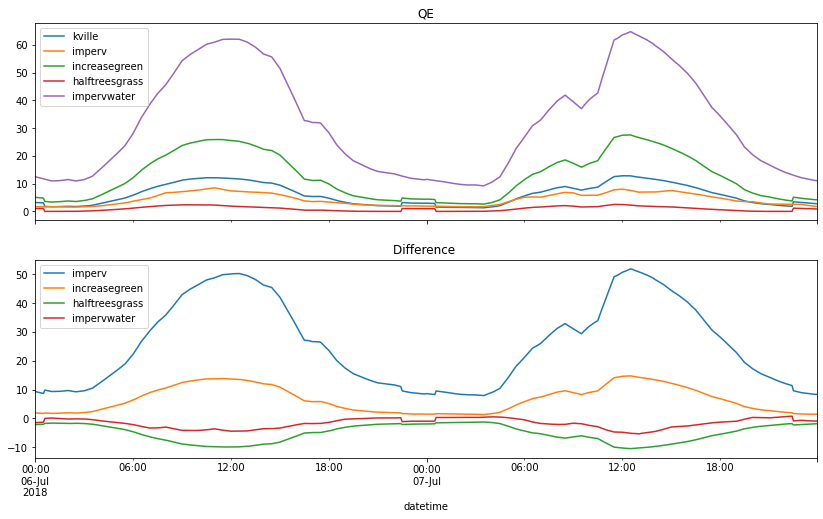

In [45]:
s = '2018 07 06'
e = '2018 07 07'

supy_plot('QE', df_merge_x, s,e, size=(14,8))

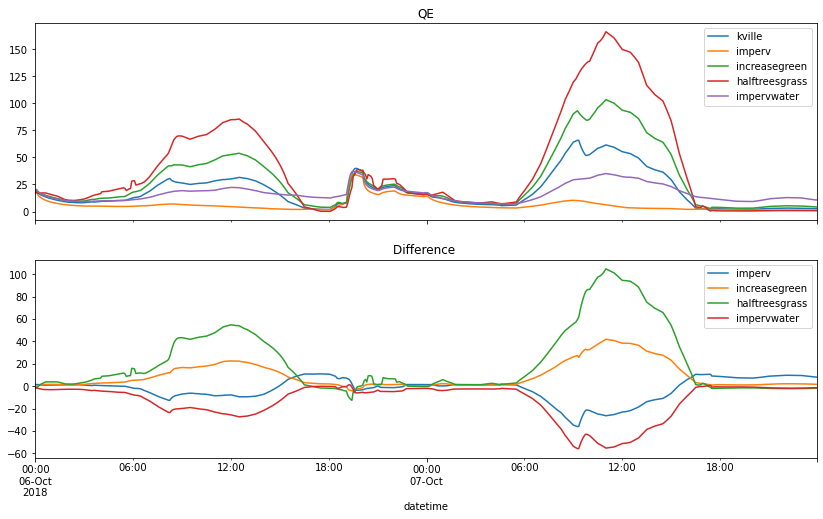

In [46]:
s = '2018 10 06'
e = '2018 10 07'

supy_plot('QE', df_merge_x, s,e, size=(14,8))

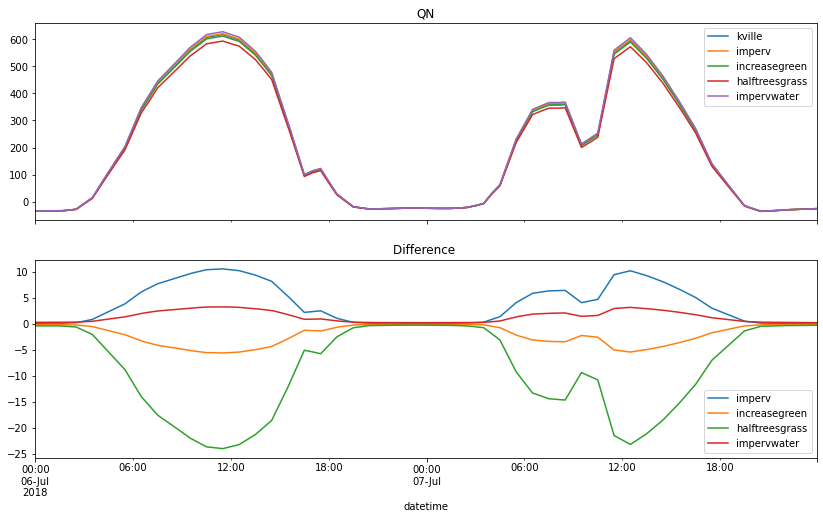

In [47]:
s = '2018 07 06'
e = '2018 07 07'

supy_plot("QN", df_merge_x, s,e, size=(14,8))

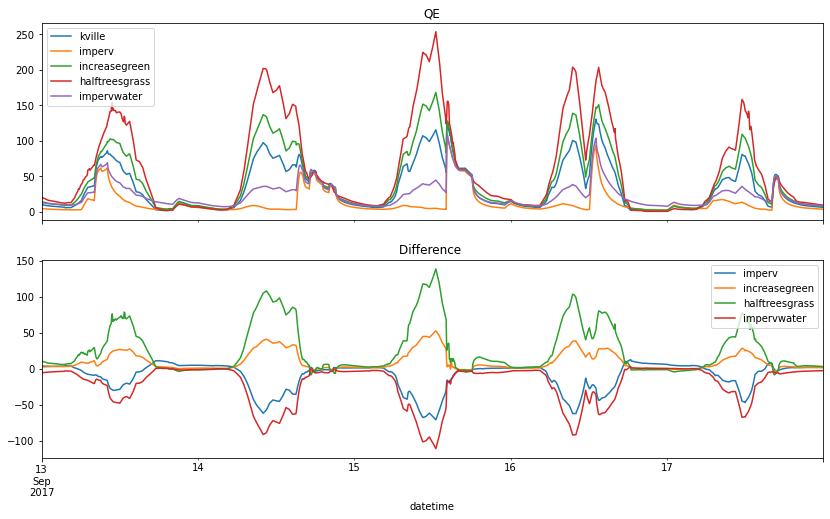

In [48]:
#kraftigt regn
s = '2017 09 13'
e = '2017 09 17'

supy_plot("QE", df_merge_x, s,e, size=(14,8))

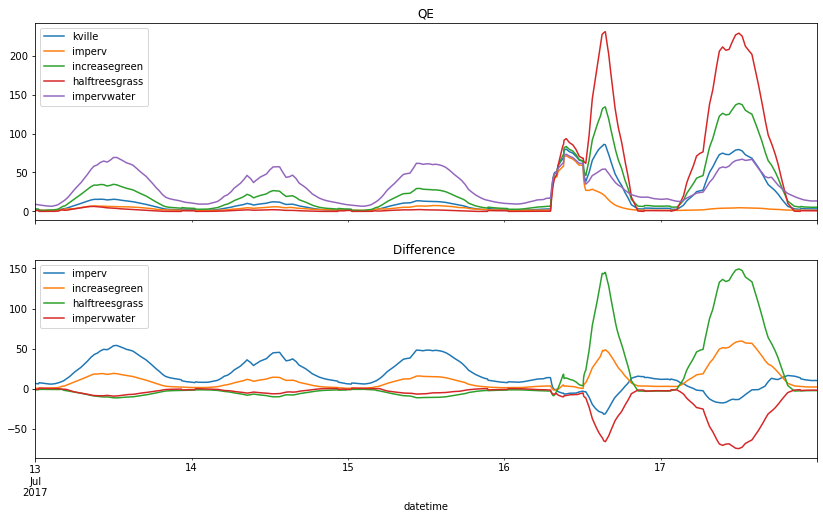

In [49]:
#varmt sedan regn morgonen 16/7
s = '2017 07 13'
e = '2017 07 17'

supy_plot("QE", df_merge_x, s,e, size=(14,8))

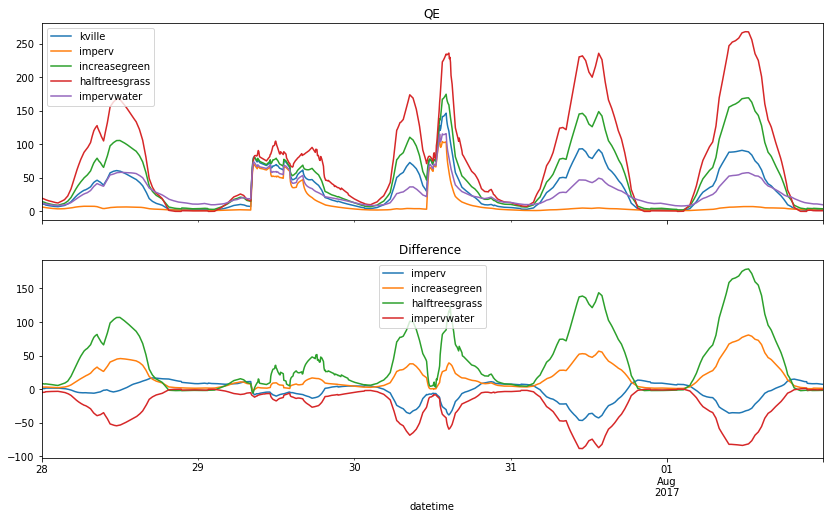

In [50]:
#varmt sedan regn morgonen 16/7
s = '2017 07 28'
e = '2017 08 01'

supy_plot("QE", df_merge_x, s,e, size=(14,8))

In [14]:
#
#sp.save_supy(df_output, df_state_final, path_runcontrol=path_runcontrol)

[PosixPath('/Volumes/NO NAME/masterarbete/SuPy/input_data/Output/Kb1_2016_DailyState.txt'),
 PosixPath('/Volumes/NO NAME/masterarbete/SuPy/input_data/Output/Kb1_2017_DailyState.txt'),
 PosixPath('/Volumes/NO NAME/masterarbete/SuPy/input_data/Output/Kb1_2018_DailyState.txt'),
 PosixPath('/Volumes/NO NAME/masterarbete/SuPy/input_data/Output/Kb1_2017_BEERS_5.txt'),
 PosixPath('/Volumes/NO NAME/masterarbete/SuPy/input_data/Output/Kb1_2017_BEERS_60.txt'),
 PosixPath('/Volumes/NO NAME/masterarbete/SuPy/input_data/Output/Kb1_2018_BEERS_60.txt'),
 PosixPath('/Volumes/NO NAME/masterarbete/SuPy/input_data/Output/Kb1_2017_RSL_5.txt'),
 PosixPath('/Volumes/NO NAME/masterarbete/SuPy/input_data/Output/Kb1_2017_RSL_60.txt'),
 PosixPath('/Volumes/NO NAME/masterarbete/SuPy/input_data/Output/Kb1_2018_RSL_60.txt'),
 PosixPath('/Volumes/NO NAME/masterarbete/SuPy/input_data/Output/Kb1_2017_SUEWS_5.txt'),
 PosixPath('/Volumes/NO NAME/masterarbete/SuPy/input_data/Output/Kb1_2017_SUEWS_60.txt'),
 PosixPath('/